In [56]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pareto
%matplotlib inline

#### Распределе́ние Паре́то 

Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето, который изначально использовал это распределение для описания распределения благосостояния, а также распределения дохода (20% популяции владеет 80% богатства). 

Распределение Парето встречается:
- В лингвистике распределение Парето известно под именем закона Ципфа 
- Распределение размера населённых пунктов
- Распределение размера файла в интернет-трафике по протоколу TCP

https://ru.wikipedia.org/wiki/Распределение_Парето

Пусть случайная величина 
$X$
такова, что её распределение задаётся равенством:

${\displaystyle F_{X}(x)=P(X<x)=1-\left({\frac {x_{\text{m}}}{x}}\right)^{k},\ \forall x\geqslant x_{\text{m}},}$
где  ${\displaystyle x_{\text{m}},k>0}$. 

Тогда говорят, что 
$X$ имеет распределение Парето с параметрами 
${\displaystyle x_{\text{m}}}$ и $k$. 

Плотность распределения Парето имеет вид


Моменты случайной величины, имеющей распределение Парето, задаются формулой


${\displaystyle \mathbb {E} \left[X^{n}\right]={\frac {kx_{m}^{n}}{k-n}},}$
откуда, в частности,

${\displaystyle \mathbb {E} [X]={\frac {kx_{m}}{k-1}}}$
.

${\displaystyle \mathrm {D} [X]=\left({\frac {x_{m}}{k-1}}\right)^{2}{\frac {k}{k-2}}.}$

Зададим параметры для распределения Парето, при которых существует дисперсия

In [57]:
xm = 1 #  коэффициент масштаба 
alpha = 3  # параметр распределения Парето

Построим гистограмму распределения Парето для выборки объема 1000

Text(0.5, 1.0, 'Гистограмма распределения Парето')

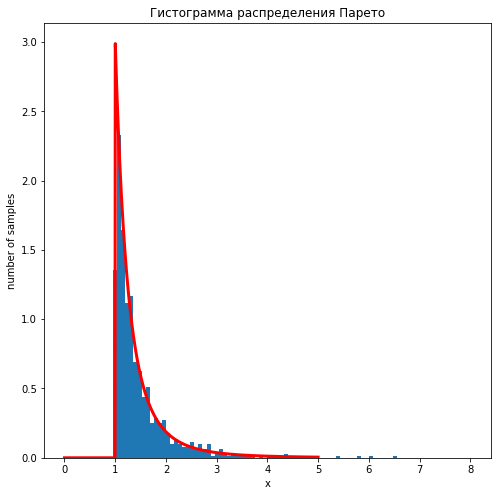

In [58]:
x = np.linspace(0, 5, 1000)
pareto=sts.pareto.pdf(x,alpha,scale=xm)
pareto_rv = sts.pareto(alpha,scale=xm)
sample = pareto_rv.rvs(1000)
plt.figure(figsize=(8,8))
plt.hist(sample, bins=100, range=(0,8), density=True)
plt.plot(x, pareto, '-r', lw=3)
plt.ylabel('number of samples')
plt.xlabel('x')
plt.title(u'Гистограмма распределения Парето')


Вычислим теоретические матожидание и дисперсию по формулам из вики

In [59]:
mean=(xm*alpha)/(alpha-1) # матожидание по Парето
var=(xm/(alpha-1)**2)*(alpha/(alpha-2)) # дисперсия 
print('Матожидание:',mean)
print('Дисперсия:',var)

Матожидание: 1.5
Дисперсия: 0.75


Сделаем 1000 выборок объема 5, 10, 50, 100, посчитаем выборочное среднее и построим гистограмму распределения выборочного среднего. По центральной предельной теореме мы сможем саппроксимировать эту гистограмму нормальным распределением с параметрами $μ$ = mean и $σ$ =  sqrt(var/n), где n - объем выборки. 


При n=5

In [60]:
n=5
sample1=np.array([])#обозначим массив выборочных средних
i=1
for i in range(1000):#цикл генерации 1000 случайных выборок количества 5 c заданными параметрами
    pareto_rv = sts.pareto(alpha,scale=xm)
    sample5i = pareto_rv.rvs(n)#генерация выборки
    mean5i=sum(sample5i)/n#определение выборочного среднего 
    sample5=np.append(sample5,mean5i)#добавляем в массив новое значение выборочного среднего
    i+=1
sigma5=math.sqrt(var/n) #стандартное отклонение для нормального распределения 
norm5 = sts.norm(mean, sigma5)#нормальное распределение с расчетными характеристиками Парето
pdf5 = norm5.pdf(x)#получаем плотность нормального распределения

Эмпирическая функция распределения для полученной выборки:

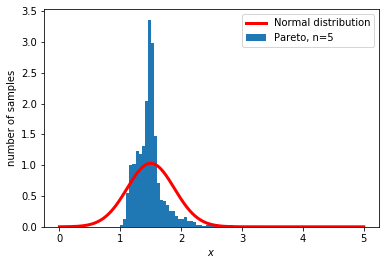

In [61]:
plt.plot(x, pdf5, '-r', lw=3, label="Normal distribution")
plt.hist(sample5, bins =100, range=(0,5), density=True, label="Pareto, n=5")
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend()

При n=10

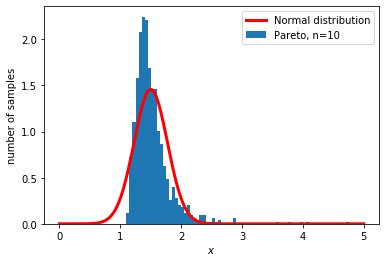

In [62]:
n=10
sample10=np.array([])#обозначим массив выборочных средних
i=1
for i in range(1000):#цикл генерации 1000 случайных выборок количества 10 c заданными параметрами
    pareto_rv = sts.pareto(alpha,scale=xm)
    sample10i = pareto_rv.rvs(n)#генерация выборки
    mean10i=sum(sample10i)/n#определение выборочного среднего
    sample10=np.append(sample10,mean10i)#добавляем в массив новое значение выборочного среднего
    i+=1
sigma10=math.sqrt(var/n) #стандартное отклонение для нормального распределения 
norm10 = sts.norm(mean, sigma10)#нормальное распределение с расчетными характеристиками Парето
pdf10 = norm10.pdf(x)#получаем плотность нормального распределения    
plt.plot(x, pdf10, '-r', lw=3, label="Normal distribution")
plt.hist(sample10, bins =100, range=(0,5), density=True, label="Pareto, n=10")
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend()

При n=50

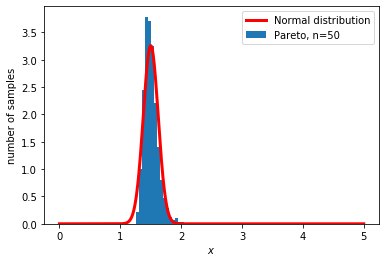

In [63]:
n=50
sample10=np.array([])#обозначим массив выборочных средних
i=1
for i in range(1000):#цикл генерации 1000 случайных выборок количества 50 c заданными параметрами
    pareto_rv = sts.pareto(alpha,scale=xm)
    sample50i = pareto_rv.rvs(n)#генерация выборки
    mean50i=sum(sample50i)/n#определение выборочного среднего
    sample50=np.append(sample50,mean50i)#добавляем в массив новое значение выборочного среднего
    i+=1
sigma50=math.sqrt(var/n) #стандартное отклонение для нормального распределения 
norm50 = sts.norm(mean, sigma50)#нормальное распределение с расчетными характеристиками Парето
pdf50 = norm50.pdf(x)#получаем плотность нормального распределения    
plt.plot(x, pdf50, '-r', lw=3, label="Normal distribution")
plt.hist(sample50, bins =100, range=(0,5), density=True, label="Pareto, n=50")
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend()

При n=100

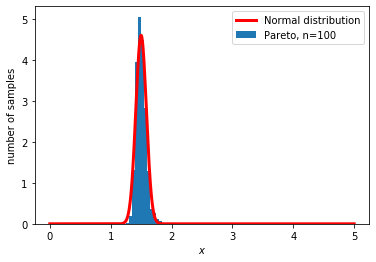

In [68]:
n=100
sample100=np.array([])#обозначим массив выборочных средних
i=1
for i in range(1000):#цикл генерации 1000 случайных выборок количества 100 c заданными параметрами
    pareto_rv = sts.pareto(alpha,scale=xm)
    sample100i = pareto_rv.rvs(n)#генерация выборки
    mean100i=sum(sample100i)/n#определение выборочного среднего
    sample100=np.append(sample100,mean100i)#добавляем в массив новое значение выборочного среднего
    i+=1
sigma100=math.sqrt(var/n) #стандартное отклонение для нормального распределения 
norm100 = sts.norm(mean, sigma100)#нормальное распределение с расчетными характеристиками Парето
pdf100 = norm100.pdf(x)#получаем плотность нормального распределения    
plt.plot(x, pdf100, '-r', lw=3, label="Normal distribution")
plt.hist(sample100, bins =100, range=(0,5), density=True, label="Pareto, n=100")
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend()

#### Заключение

 В результате исследования распределения средних значений 1000 случайных выборок разного объема  мы показали, что и среднее значение, и дисперсия данного распределения достаточно близки к теоретическим значениям. Кроме того, исследуемое распределение приближается к нормальному распределению (красная линия) при увеличении размера выборки, что подтверждает ЦПТ